<b>Principal Component Analysis </b>
Mouse | Gene1 | Gene2 | Gene3 | Gene4
--|--| --| --| --
1 | 10 | 6 | 1.2 | 5
2 | 11 | 4 | 9 | 7
3 | 8 | 5 | 10 | 6
4 | 3 | 3 | 2.5 | 2
5 | 1 | 2.8 | 1.3 | 4
6 | 2 | 1 | 2 | 7

If we only measure Gene1 how do I separate the mice?

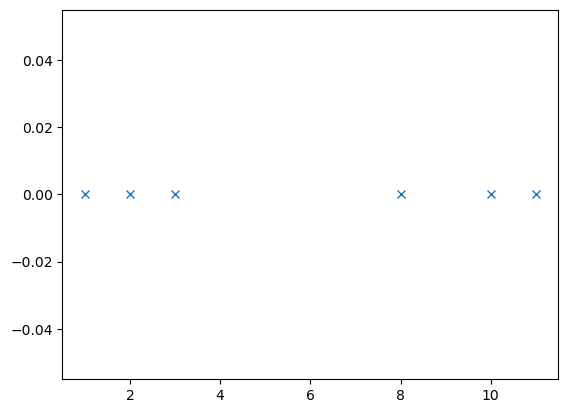

In [1]:
import numpy as np
from matplotlib import pyplot as plt
gene1 = [10, 11, 8, 3, 1, 2]
val = 0
plt.plot(gene1, np.zeros_like(gene1), 'x')

Mice 1, 2, 3 are more similar to eacho ther than they are to mice 4, 5 and 6. Lets measure two genes.

In [2]:
gene2 = [6, 4, 5, 3, 2.8, 1]

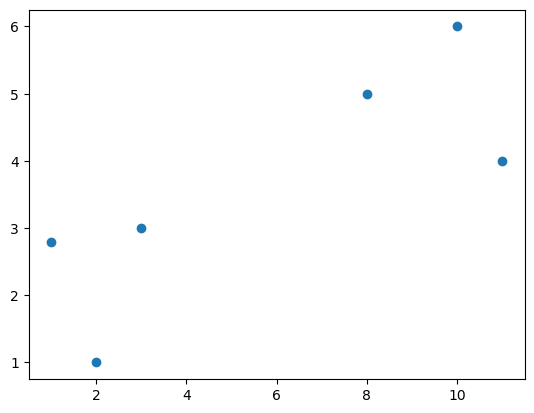

In [3]:
plt.scatter(gene1, gene2)

- PCA can tell is which gene or variable or combination of variables os the most valuable for clustering
- To understand PCA we will a dataset with the first two genes.

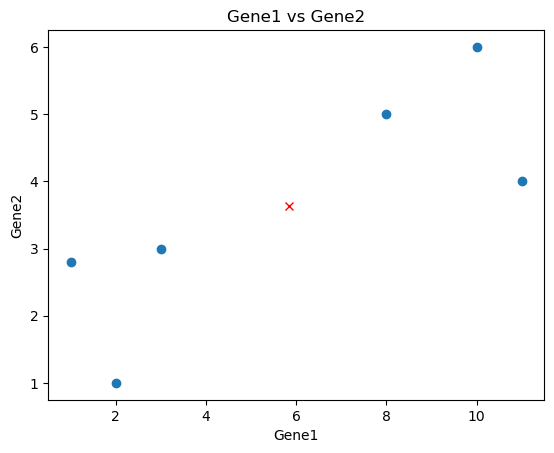

In [4]:
plt.scatter(gene1, gene2)
plt.title("Gene1 vs Gene2")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')

- We will shift the data so that the centre is at the origin
- We do this by subtracting the average from every point

In [5]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


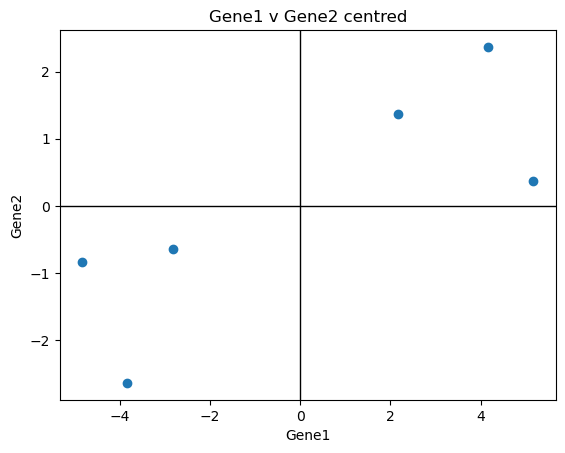

In [6]:
plt.scatter(gene1, gene2)
plt.title("Gene1 v Gene2 centred")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

- Shifting the data did not change how the points are positioned relative to each other
- Now that the data centred at the origin we can fit a line to it
- Start with a random line through the origin and rotate until it fits as good as possible
- We need to consider how PCA decides if a fit is good or not
- Consider a random starting line through the origin
- To quantify how good this line fits the data, PCA will project the data onto the line and then it will either measure the distances from the data to the line and try to find the line that minimises the distances or
- It can try and find the line that maximises the distances from the projected points to the origin
- $a^2 = b^2 + c^2$ since $a$ is fixed, as $b$ gets smaller $c$ gets bigger and vice versa
- PCA can either minimise $b$ or maximise $c$
- Intuitively it is more obvious to minimise $b$... but it is easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the dim of the squared distances of the projected point to the origin
- Rotate the line to find the largest SS
- This line called Principal Component 1 or PC1 for short

In [7]:
from scipy import stats
slope, intercept, _, _, _ = stats.linregress(gene1, gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


- PCA1 has slope 0.323. In other words for every 3 units we go along the gene1 axis we go up one on the gene2 axis
- This means that the data is mostly spread out along the gene1 axis and only a little spread out along the gene2 axis
- To make PC1 we take 3 parts gene1 and 1 part gene2
- The ratio of gene1 to gene2 tells you that gene1 is more important when it comes to describing how the data is spread out
- PC1 is a <b>linear combination</b> or gene1 and gene2
- When you do PCA using Singular Value Decomposition (SVD), the recipe for PC1 is scaled so that its length is 1. In our case we need to divide by $\sqrt(10)$
- PC1 = $\frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$
- The unit vector is called the singular vector or the eigenvector of PC1
- The proportions of each gene are called "Loading Scores"
- PCA calls the average of the SS distances for the best fit line the eigenvalue for PC1
- $\frac{SS(distances for PC1))}{n-1}$ = Eigenvalue for PC1
- $\sqrt{SS(distances for PC1)}$ = Singular value for PC1
- Because our example is 2D, PC2 is the line that goes through the origin, perpendicular to PC1
- PC2 = -1gene1 + 3gene2
- Scaling PC2 to get unit vector $\frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$
- For PC2 gene2 is 3 times more important than gene1
- To draw the final PCA plot rotate everything so that PC1 is horizontal. Then we can use the projected points to see where the samples are in the PCA plot.
- Eigenvalues are measures of variation
- For the sake of this example imagine that he variation for PC1 is 15 and the variation for PC2 is 3
- Total variation = 18
- This means that PC1 accounts for 15/18 = 83% of the total variation around the PCs
- A scree plot is a graphical representation of percentages of variation that PC accounts for

<b> PCA with 3 variables</b>
- Centre the data
- Find the line of best fit through the origin - PC1
- $PC1 = 0.62gene1 + 0.15*gene2 + 0.77gene3$
- PC2 is the next best fitting line that goes through the origin and is at right angles to PC1
- PC2 = 0.77gene1+0.62gene2+0.15gene3
- PC3 is the next best fitting line through the origin that is orthogonal to both PC1 and PC2
- In theory there is one PC per gene (or variable) but in practice the number of PCs is either the number of variables or the number of samples whichever is smaller
- Once we have all of the PCs we can use the eigenvalues to determine the proportion of variation that PCs account for
- Suppose PC1 accounts 79%, PC2 15%, PC3 for 6%


In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [9]:
genes = ['gene'+str(i) for i in range(1, 101)]
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1, 6)]

In [10]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [12]:
print(data.head())

       wt1  wt2  wt3  wt4   wt5  ko1  ko2  ko3  ko4  ko5
gene1  863  859  813  832   830  765  733  740  789  754
gene2  929  948  949  969  1032  498  516  498  547  545
gene3  906  908  856  889   920   13   12   18   10   13
gene4  202  195  209  200   192  288  237  290  260  270
gene5  619  574  573  572   568  152  160  151  140  158


In [13]:
print(data.shape)

(100, 10)


In [14]:
scaled_data = preprocessing.scale(data.T)

In [15]:
scaled_data

array([[ 1.42123842,  0.82900836,  1.02245652, -0.85951385,  1.17361012,
         1.01940965, -0.98551731,  0.92252093,  1.06349215,  1.08640592,
         0.33210981, -0.98031875, -0.96982621, -1.00758381, -1.6168995 ,
         1.05917513, -1.07977844,  1.26378119, -1.23656008,  0.99101879,
         1.01482047,  1.08640407,  0.68316545,  0.94657728,  0.64524097,
        -0.83758497, -0.51629661,  1.14313562, -0.94872832,  1.21100023,
         0.89645476, -0.91038024,  0.98874216,  1.19886419,  0.8348879 ,
         0.91013435,  1.16020377,  1.03180392, -1.03308504, -1.02549216,
        -0.95306683, -1.07344951, -0.15964916,  0.99970136, -1.13325709,
        -1.12568288, -0.97812245,  0.8385774 ,  1.35461959,  1.09994597,
        -0.94625356,  0.28238034,  0.72058553,  1.30125531,  1.41888343,
        -0.9818374 , -0.98855462,  0.72243293,  1.14966817,  1.00641995,
         1.11508523,  1.06561145, -1.07650103,  1.04870411,  0.80679391,
         0.95708673, -1.31029846, -1.11176748,  1.0

In [17]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var


array([90.7,  2.4,  1.6,  1.4,  1.3,  0.9,  0.8,  0.5,  0.4,  0. ])

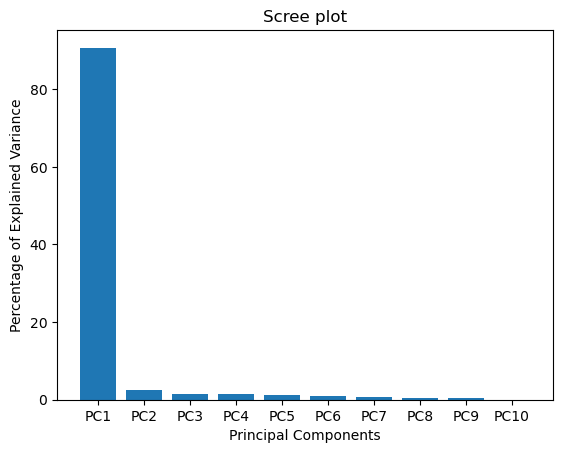

In [18]:
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree plot")
plt.show()


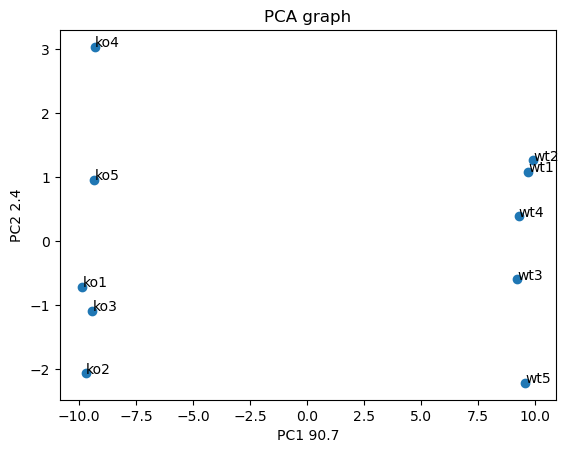

In [22]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()


In [26]:
loading_scores = pd.Series(pca.components_[0], index=genes)
print(*loading_scores)

0.09584216970526005 0.1041093305161842 0.10495615337052956 -0.09708522990636645 0.1047620044075797 0.10422115700364916 -0.10460544876701106 0.10446440194084909 0.10422753585876919 0.10465885353480422 -0.0645014916829421 -0.10444146300008375 -0.104887087846861 -0.10483240906355067 -0.0985191787082216 0.07480112931336318 -0.10475734730519164 0.09547889555302491 -0.10075798477347675 0.10437940553946012 0.1045307541891203 0.10479276814090485 0.09918144521375863 0.1039849901614935 0.09995264923325152 -0.10446420051023626 -0.10145208457546029 0.10452970543849364 -0.10370042036676613 0.1035189930956894 0.10400958402365015 -0.10434098935095198 0.10492667904328905 0.1043540303958883 0.10190541346980628 0.10467817578822353 0.10041175559179304 0.10488700298165197 -0.10483644439994937 -0.10490804610129452 -0.10423639519931444 -0.10482162690761096 0.07475422727401701 0.10483782446080038 -0.10462252917539998 -0.10467445486557209 -0.10365429188024038 0.10408790055381854 0.08525945795683983 0.10456458

In [24]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

In [25]:
top_10_genes

array(['gene3', 'gene33', 'gene98', 'gene40', 'gene64', 'gene13',
       'gene38', 'gene85', 'gene78', 'gene57'], dtype=object)

**PCA on MNIST**
- MNIST data has redundant pixels. Getting rid of redundant pixels will:
  - Faster training and inference
  - Data visualisation easier

- PCA is a process of figuring out the most important features that have the most impact on the target variable
- Scale features before applying PCA
- Accuracy might drop

In [27]:
import pandas as pd
from sklearn.datasets import load_digits

In [29]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [31]:
dataset.data.shape

(1797, 64)

In [32]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

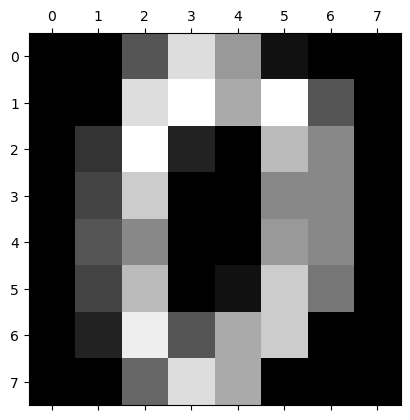

In [34]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [36]:
dataset.target[0]

0

In [38]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [43]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [45]:
X = df
y = dataset.target

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [81]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 40)

In [82]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [83]:
per_var = pca.explained_variance_ratio_

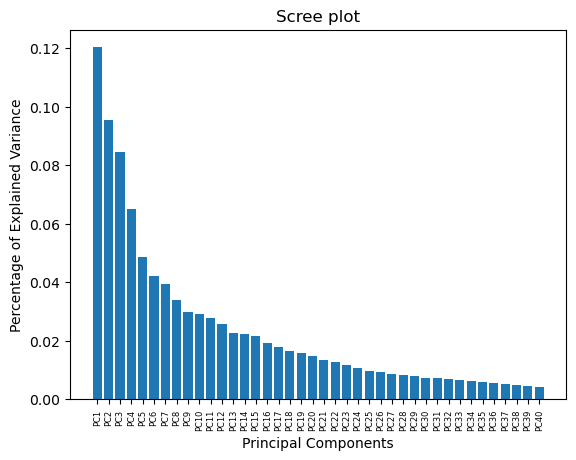

In [84]:
labels = ['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.xticks(rotation='vertical', fontsize=6)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree plot")
plt.show()

In [85]:
pca.n_components_

40

In [86]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9648148148148148

In [121]:
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 13)

In [122]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860153,
       0.04214112, 0.03942043, 0.03389213, 0.02997936, 0.02931129,
       0.02781287, 0.02576763, 0.0227381 ])

In [123]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=30)

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.912962962962963

**Advantages and disadvantages of PCA**
**Advantages**
1. **Dimensionality reduction**: By reducing the number of variables PCA simplifies data analysis, improves performance and makes it easier to visualise the data
2. **Feature selection**: PCA can be used for feature selection, which is a processing of selecting the most important variables in the dataset. This is useful in machine learning where the number of variables can be very large, and it is difficult to identify the important variables.
3. **Data visualisation**: PCA can be used for data visualisation. By reducing the number of variables, PCA can plot high dimensional data in 2 or three dimensions, making it easier to interpret.
4. **Multicolinearity**: PCA can be used to deal with multicolinearity, which is a common problem in regression analysis where two or three independent variables are strongly correlated. PCA can help to identify the underlying structure in the data and create new uncorrelated variables that can be used in the regression model.
5. **Noise reduction**: PCA can be used to reduce noise in data. By removing principal components with low variance, which is assumed to represent noise; PCA can improve the signal-to-noise ratio and make it easier to identify the underlying structure of the data
6. **Data Compression**: PCA can be used for data compression. By representing the data using a smaller number of principal components, which capture most of the variation in the data, PCA can reduce storage requirements and speed up processing
7. **Outlier Detection**: PCA can be used for outlier detection. Outliers are points that are significantly different from the other points in the dataset. PCA can identify outliers by looking for data points that are far away from other points in the principal component space

**Disadvantages**
1. **Interpretation of the Principal Components**: The principal components created by PCA are linear combinations of the original variables and it is often difficult to interpret them in terms of the original variables. This can make it difficult to explain the results of PCA to others
2. **Data Scaling**: PCA is sensitive to the scale of the data. If the data is not scaled properly, PCA will not work well. It is very important to scale before doing PCA
3. **Information Loss**: PCA can result in information loass. While PCA reduces the number of variables, it can lead to a loss of information. The degree of information loss depends on the principal components selected. It is important to carefully select the principal components that you keep.
4. **Non-linear relationships**: PCA assumes that the relationships between the variables are linear. If there are non-linear relationships between variables PCA doesn't work that well
5. **Computational Complexity**: Computing PCA can be computing expensive for large data sets. For n points with p features $O(p^2n+p^3)$
6. **Overfitting**: PCA can sometimes result in overfitting, which is when the model fits the training data too well and doesn't generalise. This can happen if too many principal components are used or the model is trained on too small of a dataset